In [66]:
import pandas as pd
import numpy as np
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn import metrics

In [2]:
trainset = pd.read_csv('Data\credit_card_default_train.csv', index_col='Client_ID' )
testset = pd.read_csv('Data\credit_card_default_test.csv', index_col='Client_ID' )

In [3]:
trainset['Balance_Limit_V1'] = trainset['Balance_Limit_V1'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
testset['Balance_Limit_V1'] = testset['Balance_Limit_V1'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [81]:
testset = testset.sort_values('Client_ID')

In [4]:
target = 'NEXT_MONTH_DEFAULT'

IDcol = 'Client_ID'

predictors = [x for x in trainset.columns if x not in [target, IDcol]]

cate_features_name = ["Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE",'PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']

In [70]:
train_all, test_all = train_test_split(trainset, test_size=0.30, random_state=42, stratify = trainset[target])

In [74]:
model = CatBoostClassifier(iterations=500, learning_rate=0.1, loss_function= 'Logloss', eval_metric='F1', use_best_model=True,random_seed=100)

In [78]:
model.fit(
    trainset[predictors], trainset[target],
    cat_features=cate_features_name,
    eval_set=(test_all[predictors], test_all[target]), 
)

emaining: 13.8s
278:	learn: 0.5310831	test: 0.5342903	best: 0.5342903 (271)	total: 17.3s	remaining: 13.7s
279:	learn: 0.5312462	test: 0.5341317	best: 0.5342903 (271)	total: 17.4s	remaining: 13.7s
280:	learn: 0.5315042	test: 0.5347167	best: 0.5347167 (280)	total: 17.5s	remaining: 13.6s
281:	learn: 0.5316333	test: 0.5347167	best: 0.5347167 (280)	total: 17.5s	remaining: 13.6s
282:	learn: 0.5317624	test: 0.5341317	best: 0.5347167 (280)	total: 17.6s	remaining: 13.5s
283:	learn: 0.5319407	test: 0.5341317	best: 0.5347167 (280)	total: 17.7s	remaining: 13.4s
284:	learn: 0.5319407	test: 0.5347167	best: 0.5347167 (280)	total: 17.7s	remaining: 13.4s
285:	learn: 0.5316333	test: 0.5347167	best: 0.5347167 (280)	total: 17.8s	remaining: 13.3s
286:	learn: 0.5321190	test: 0.5347167	best: 0.5347167 (280)	total: 17.8s	remaining: 13.2s
287:	learn: 0.5328963	test: 0.5345034	best: 0.5347167 (280)	total: 17.9s	remaining: 13.2s
288:	learn: 0.5328963	test: 0.5350877	best: 0.5350877 (288)	total: 17.9s	remaining: 

<Figure size 432x288 with 0 Axes>

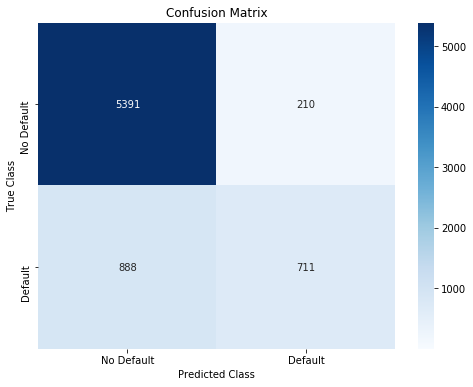

In [79]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(test_all[target], model.predict(test_all[predictors]))
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [67]:
def f1score(m, train, test): 
    return (metrics.roc_auc_score(train[target],m.predict(train[predictors])),
                            metrics.roc_auc_score(test[target],m.predict(test[predictors])))

In [77]:
f1score(model, train_all, test_all)

(0.6855676689047036, 0.6679405614047076)

In [84]:

df_3 = pd.DataFrame(model.predict(testset))
df_3.to_csv('out3.csv')